In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv("daylio_export_2020_04_09.csv")

#fixes full_date col
def fix_date_string(date_string):
    if len(date_string.split('/')[0]) == 1:
        new_str = "0"+date_string
    else:
        new_str = date_string
    return datetime.strptime(new_str, "%d/%m/%Y")
df['full_date'] = df['full_date'].map(fix_date_string)

df.head(10)

,full_date,date,weekday,time,mood,activities,note
0,2020-04-09,9-Apr,Thursday,7:54,meh,NaN,NaN
1,2020-04-08,8-Apr,Wednesday,21:04,meh,dislike work,NaN
2,2020-04-08,8-Apr,Wednesday,7:19,good,neutral work,NaN
3,2020-04-07,7-Apr,Tuesday,21:25,meh,dislike work,NaN
4,2020-04-07,7-Apr,Tuesday,7:09,good,NaN,NaN
5,2020-04-06,6-Apr,Monday,21:00,good,NaN,NaN
6,2020-04-06,6-Apr,Monday,7:06,good,learning | procrastinating | neutral work,NaN
7,2020-04-05,5-Apr,Sunday,22:28,good,NaN,NaN
8,2020-04-05,5-Apr,Sunday,7:55,good,NaN,NaN
9,2020-04-04,4-Apr,Saturday,22:55,good,learning | cooking | neutral work | scared,NaN


Classify by morning or evening

In [3]:
def morning_or_night(time_str):
    """Lazy classification of time strings by morning or night, if len == 4 then string is before 10am, if len == 5 then its post 10am"""
    if len(time_str) == 4:
        return 'morning'
    elif len(time_str) == 5:
        return 'evening'
    else:
        return 'fail'

#doesn't fail for any point
df['time'].loc[df['time'].map(morning_or_night) == 'fail']

Series([], Name: time, dtype: object)

In [4]:
df.loc[:,'morn_or_night'] = df['time'].map(morning_or_night)

In [5]:
def work_status(activity_str):
    activity_str = str(activity_str)
    if "dislike work" in activity_str:
        return 'dislike work'
    elif "neutral work" in activity_str:
        return 'neutral work'
    elif 'like work' in activity_str:
        return 'like work'
    else:
        return 'not reported'
    
df.loc[:,'work_status'] = df['activities'].map(work_status)

In [6]:
df

,full_date,date,weekday,time,mood,activities,note,morn_or_night,work_status
0,2020-04-09,9-Apr,Thursday,7:54,meh,NaN,NaN,morning,not reported
1,2020-04-08,8-Apr,Wednesday,21:04,meh,dislike work,NaN,evening,dislike work
2,2020-04-08,8-Apr,Wednesday,7:19,good,neutral work,NaN,morning,neutral work
3,2020-04-07,7-Apr,Tuesday,21:25,meh,dislike work,NaN,evening,dislike work
4,2020-04-07,7-Apr,Tuesday,7:09,good,NaN,NaN,morning,not reported
...,...,...,...,...,...,...,...,...,...
564,2019-01-06,6-Jan,Sunday,22:45,good,NaN,NaN,evening,not reported
565,2019-01-06,6-Jan,Sunday,11:11,good,shopping,NaN,evening,not reported
566,2019-01-05,5-Jan,Saturday,11:57,good,good meal,NaN,evening,not reported
567,2019-01-04,4-Jan,Friday,23:31,good,sleeping,NaN,evening,not reported


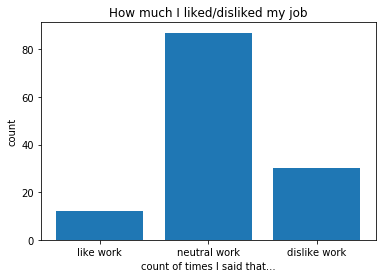

In [7]:
freq_table = {'like work': Counter(df.loc[df["activities"].map(lambda x: "dislike work" in str(x)) == False]["activities"].map(lambda x: "like work" in str(x)))[True],
             'neutral work': Counter(df["activities"].map(lambda x: "neutral work" in str(x)) == True)[True],
             'dislike work': Counter(df["activities"].map(lambda x: "dislike work" in str(x)) == True)[True]}
plt.bar(x=freq_table.keys(), height=freq_table.values())
plt.title("How much I liked/disliked my job")
plt.xlabel("count of times I said that...")
plt.ylabel("count")
plt.show()

In [8]:
dfRelevantToWorkStatus = df[0:152]
containsworkstatus_dict = Counter(dfRelevantToWorkStatus['activities'].map(lambda x: "work" in str(x)))
print("No work status recorded: %.0f"%(containsworkstatus_dict[False]))
print("Work status was recorded: %.0f"%(containsworkstatus_dict[True]))

No work status recorded: 23
Work status was recorded: 129


In [9]:
len(dfRelevantToWorkStatus)

152

In [10]:
len(Counter(dfRelevantToWorkStatus['full_date']))

78

In [11]:
total = 12+87+30
print("ratio of work status")
for key in freq_table.keys():
    print("%s: %s (%.2f)"%(key, freq_table[key], (freq_table[key]/total)))

ratio of work status
like work: 12 (0.09)
neutral work: 87 (0.67)
dislike work: 30 (0.23)


In [12]:
12+87+30

129

In [13]:
23+129

152

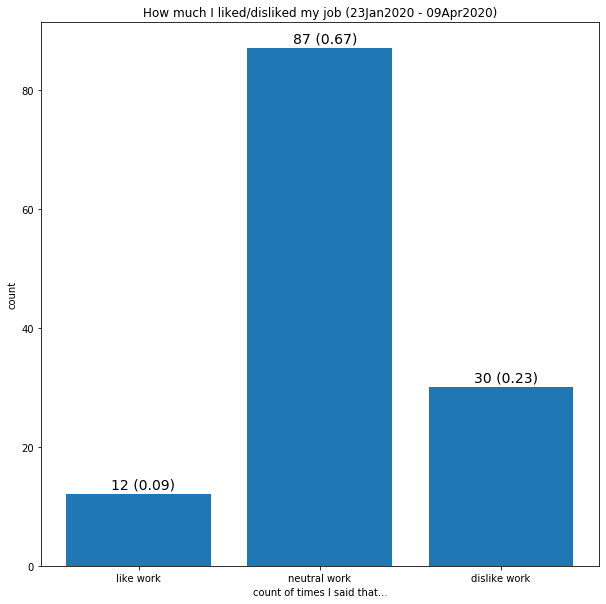

In [14]:
f, ax = plt.subplots(figsize=(10,10))

ax.bar(x=list(freq_table.keys()), height=list(freq_table.values()))
plt.title("How much I liked/disliked my job (23Jan2020 - 09Apr2020)")
plt.xlabel("count of times I said that...")
plt.ylabel("count")

ax.annotate('12 (0.09)', (-.15, 13), fontsize=14)
ax.annotate('87 (0.67)', (0.85, 88), fontsize=14)
ax.annotate('30 (0.23)', (1.85, 31), fontsize=14)

plt.show()

In [15]:
morning_work = dfRelevantToWorkStatus.loc[dfRelevantToWorkStatus['morn_or_night'] == 'morning']
evening_work = dfRelevantToWorkStatus.loc[dfRelevantToWorkStatus['morn_or_night'] == 'evening']

In [29]:
mornVSevening_twoway = pd.crosstab(dfRelevantToWorkStatus['morn_or_night'], dfRelevantToWorkStatus['work_status'], margins=True)
mornVSevening_twoway

work_status,dislike work,like work,neutral work,not reported,All
morn_or_night,,,,,
evening,16,7,45,9,77
morning,14,5,42,14,75
All,30,12,87,23,152
